# Тестовое задание 
## Цель:
    Провести данных о данных цены домов в ш.Эйова, г.Эймс, США
## Задача:
    Изучить зависимость целевой переменной(SalePrice)

In [4]:
import numpy as np 
import pandas as pd 
import plotly.offline as offline
import plotly.graph_objs as go
# import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', 500) 

Даны два файла трейн и тест, но тест не будем использовать для анализа, так как там отсутствуют данные о цене.

In [5]:
train_df = pd.read_csv("D:/test_house/train.csv")

In [6]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


Видим, что данные содержат строковые и численные признаки. Возьмём для анализа только численные признаки.

In [7]:
drop_col = [col for col in train_df if train_df[col].dtypes=='O']
numerical_data =train_df.drop(drop_col, axis=1)
numerical_data.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

Проверим наши данные на пропуски

In [8]:
numerical_data.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

### Есть нескольк способов обработки пропущеных значений:
    1: Замена модой 
    2: Замена средним
    3: Замена медианой
### Пробуем их все

In [9]:
for col in numerical_data:
    num_null = numerical_data[col].isnull().sum()
    if num_null !=0:
        choose = np.random.randint(1,4)
        if choose==1:
            ins_med = numerical_data[col].median()
            numerical_data.fillna(ins_med, inplace=True)
        elif choose==2:
            ins_mod = numerical_data[col].mode()
            numerical_data.fillna(ins_mod, inplace=True)
        elif choose==3:
            ins_men = numerical_data[col].mean()
            numerical_data.fillna(ins_men, inplace=True)

In [10]:
numerical_data.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

Мы избавились от пропусков в данных, приступим к анализу. 
Сразу посмотрим общую информацию.

In [11]:
numerical_data.drop('Id', axis=1, inplace=True)

In [12]:
numerical_data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    22.024023    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    70.049958    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.500959   443.639726    46.549315   
std      30.202904     20.645407   180.586195   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean       2.866438      1.046575      6.517808     0.613014  1872.626059   
std        0.815778      0.220338      1.625393     0.644666   437.679677   
min        0.000000      0.000000      2.000000     0.000000    70.049958   
25%        2.000000      1.000000      5.000000     0.000000  1958.000000   
50%        3.000000      1.000000      6.000000     1.000000  1977.000000   
75%        3.000000      1.000000      7.000000     1.000000  2001.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

### В данных присутствуют несколько типов недвижимости:
       AG   Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
### Будем проводить анализ данных с учётом типа недвижимости

In [13]:
keys = train_df['MSZoning'].value_counts().index
class_index = {i: train_df[train_df['MSZoning']==i].index for i in keys}
class_town = {key: numerical_data.iloc[class_index[key]] for key in class_index}

Первое, что мы сделаем посмотрим действительно ли цены на недвижимость значительно отличаются в зависимости от категории  

In [14]:
fig = go.Figure()
for key in class_town:
    fig.add_trace(go.Box(y=class_town[key].SalePrice, name=key))
fig.show()

По графика box-plot можем видеть, что цены различаются в зависимости от категории, чтобы окончательно в этом убедиться проведём дисперсионный анализ.

In [15]:
test_val = [class_town[key].SalePrice for key in class_town]
kruskal(test_val[0], test_val[1], test_val[2], test_val[3],
        test_val[4])

KruskalResult(statistic=270.0701971937021, pvalue=3.0807239995999556e-57)

И так, по результатам видно, что выборки цен в зависимости от категории имеют значимые статистические различия, так что имеет смысл проводить анализ цен в зависимости от категории

# Проведём небольшое иследование, какое количество вариантов недвижемости доступно амереканской семье с двумя работющими людьми

Не будем использовать данные о комерческой недвижемости и плавающих домах 

In [16]:
all_price = np.concatenate([class_town['RL'].SalePrice, class_town['RM'].SalePrice, class_town['RH'].SalePrice])

Средний доход жителя штата Айова составляет 70780$ в год. В семье два работающих человека соответсвенно посчитаем смарный доход как две средние. 
В месяц после вычета налогов(24%) составляет 8965, предположим что на недвижеомсть семья готова тратить 20% своего дохода ежемесячно. 90% американцев берут ипотеку на 30 лет под 3.7%. На таких условиях и с суммой ежемесячного платежа 1793 банк готов дать 389000$
(Дополнительная информация получена из <a href=" https://www.iowastatebank.net/calculators/loan-calculator?cf_chl_managed_tk=c1901d045e1650664f719efebf5507df3b18c2ea-1623932837-0-ARa2-N7VH0pJEvMaKhug32ZpwQFTGiwRNsT4e_yghtHmsrFrOFpyFBYCGW1crjSUoWMpYH3G2lGOeLaLOaKlnx2yyvBGZpPe9B7H-0VWs0IHjgOL27gMD1N9AytJ_5KO1h9scU-tIYvUzqN8Ij8q3Gi3AX1HDeFzv_kEWovwAOXgbtbQKUB2nkrIZE1bnB-CzGKhzysiLz9REaln6Lzawe7BtwGke4Og5r8TgbTrOZoqgK4KVneN0LY17pO24bfOmSrc7heasIsx-Dg1Op9ZLAXkQH_BjI1sD8zt4918KKD8vOIj8tTiKAVI45CdSmXv6o9ttwzW_Dbvu09LI6dCew0GS0r9D5TExn2GqXgFBAoysaVoxb7dPTkzLim6BAuu2KVpCXOy0cCtdWrtlw0Uo3L-PCiVQFgVJ3qQHUKHOhJWQHKBIEW5ZkURwmw-UZoVl2BrfkEfLHX5HPlJpfyCn7cQ6bE4vyAp-KIifNm7_jU_DN2JMWTtlota3pxh7KYi8H6HuffKXCpjUOJlpfuh9RLaOjCMlKz1_nlLJcCpvMKQL9_DYJRrK45ejrJ-9tY_hRU2lVx7kXQKegTdczIC_CbgETcRMh9FqWGY20lpt6RXACbjaZ8znOP94mhxBBd0ZyHlVNzAsnORM8JRnLw3LaA">Источник 1</a>,  <a href="https://usa-info.com.ua/live-usa/ipoteka-v-ssha-dlya-amerikantsev-i-inostrannykh-grazhdan">Источник 2</a>, <a href="http://rusker.ru/1791-srednie-zarplati-usa-po-shtatam-2011.html">Источник 3</a>)





In [17]:
budget = np.log(389000)

In [18]:
variants = np.where(np.log(all_price)<=budget)

Text(12.671334622600584, 0.7, 'Бюджет')

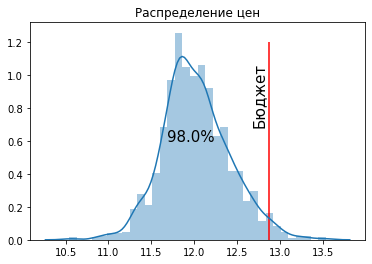

In [19]:
fig, ax = plt.subplots()
sns.distplot(np.log(all_price), ax=ax)
ax.set_title('Распределение цен')
# ax.scatter(x=budget, y =len(variants[0])/len(all_price), c='r')
ax.vlines(budget, 0,1.2, colors='r')
ax.text(11.68,0.6, f'{np.round(len(variants[0])/len(all_price),2)*100}%',fontsize = 15)
ax.text(budget-0.2,0.7, f'Бюджет',fontsize = 15, rotation='vertical')

По графику видно, что наша семья сможет выбирать жильё из 98% всех доступных вариантов. Из этого можно сделать вывод, что цены на жильё в городе доступные для среднестатистических семей США.

# Дальше посмотри на динамику цен за годы и есть ли сезонная зависимость цен

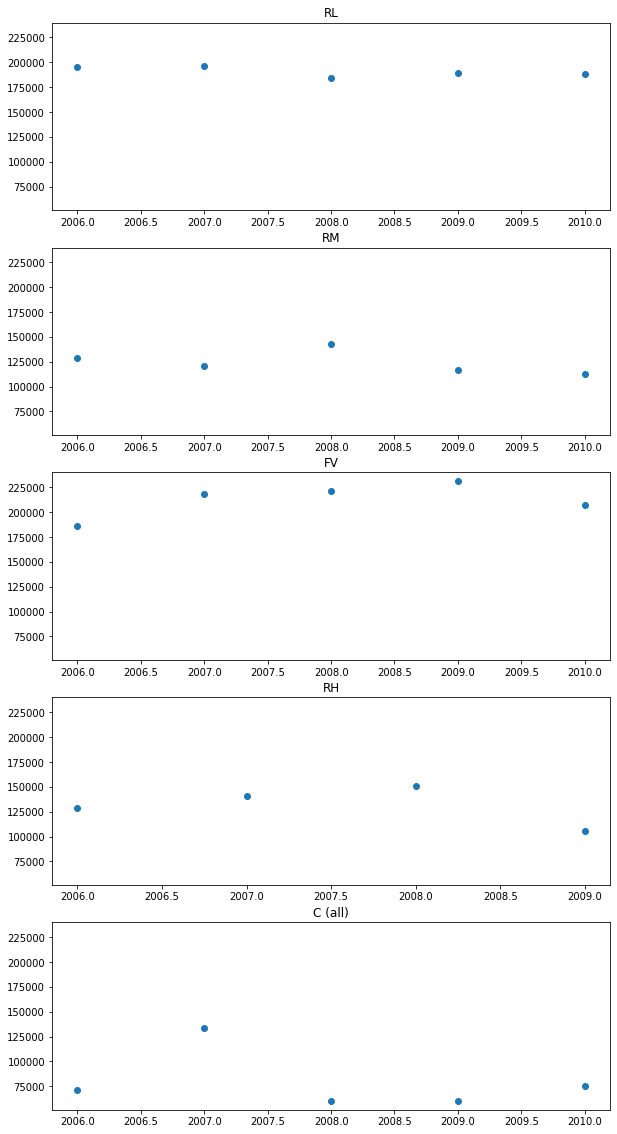

In [20]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize = (10,20), sharey=True)
row_id = 0 
for num, key in enumerate(class_town):
    data= class_town[key]
    y = data.groupby('YrSold')['SalePrice'].mean().values
    x = data.groupby('YrSold')['SalePrice'].mean().index
    ax[num].set_title(key)
    ax[num].scatter(x=x, y=y)

При инвестировании в неджвижемость в г.Эймсе, штат Айова не стоит ждать прибели, так как в большинстве типов тренд отсутствует или идёт вниз.

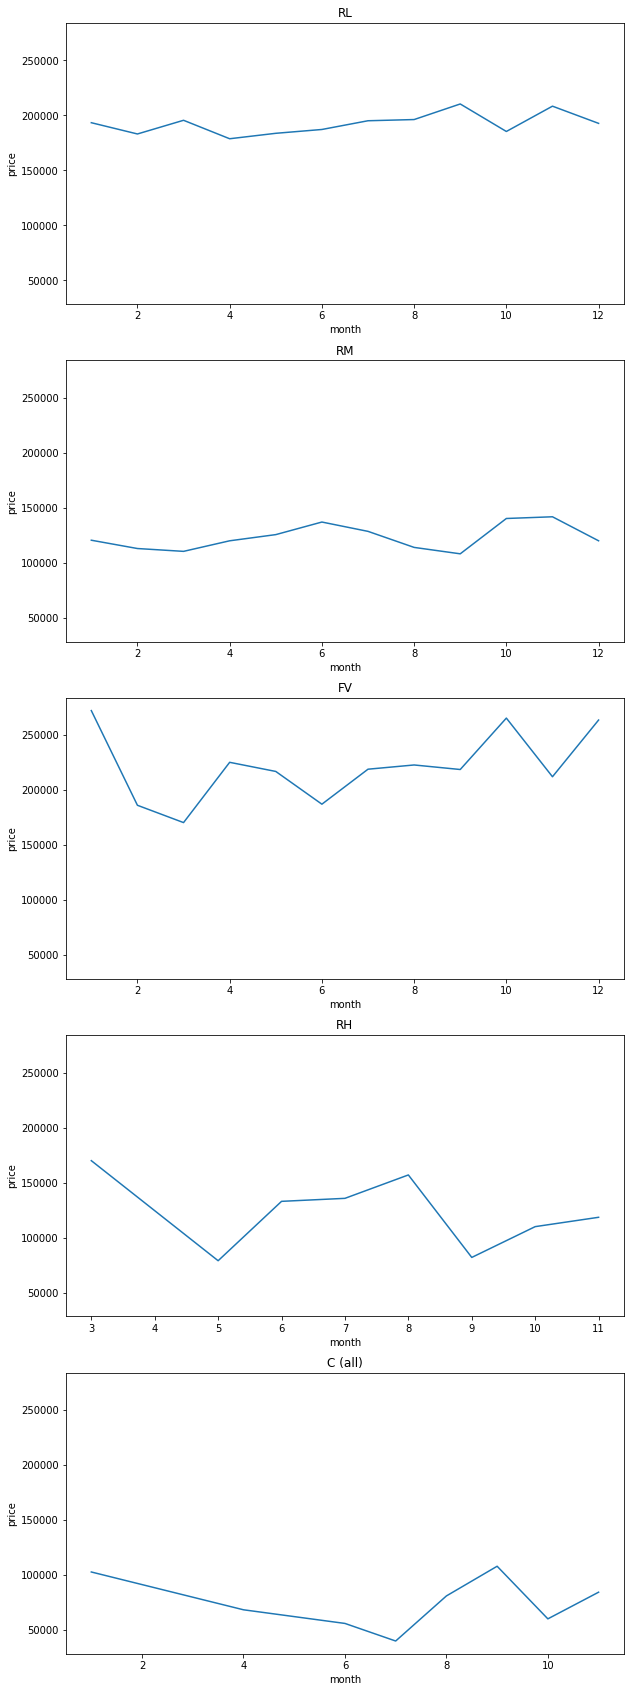

In [21]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize = (10,30), sharey=True)
row_id = 0 
for num, key in enumerate(class_town):
    data= class_town[key]
    y = data.groupby('MoSold')['SalePrice'].mean().values
    x = data.groupby('MoSold')['SalePrice'].mean().index
    ax[num].set_title(key)
    ax[num].set_xlabel('month')
    ax[num].set_ylabel('price')
    ax[num].plot(x, y)


 На этих графиках мы можем видеть, что цена зависит от сезона продажи, нужно это учитывать при покупке недвижемости

 В предидущей части мы провели анлиз цен на недвижемость. Узнали о возможносятх амереканской семьи в городе Эймс, высянили что цены зависят от гатегории недвижемости, посмотрели на димамику изменения цен во времени и сезонность цен. 
 Дальше посмотрим от каких параметров цена зависит больше всего.

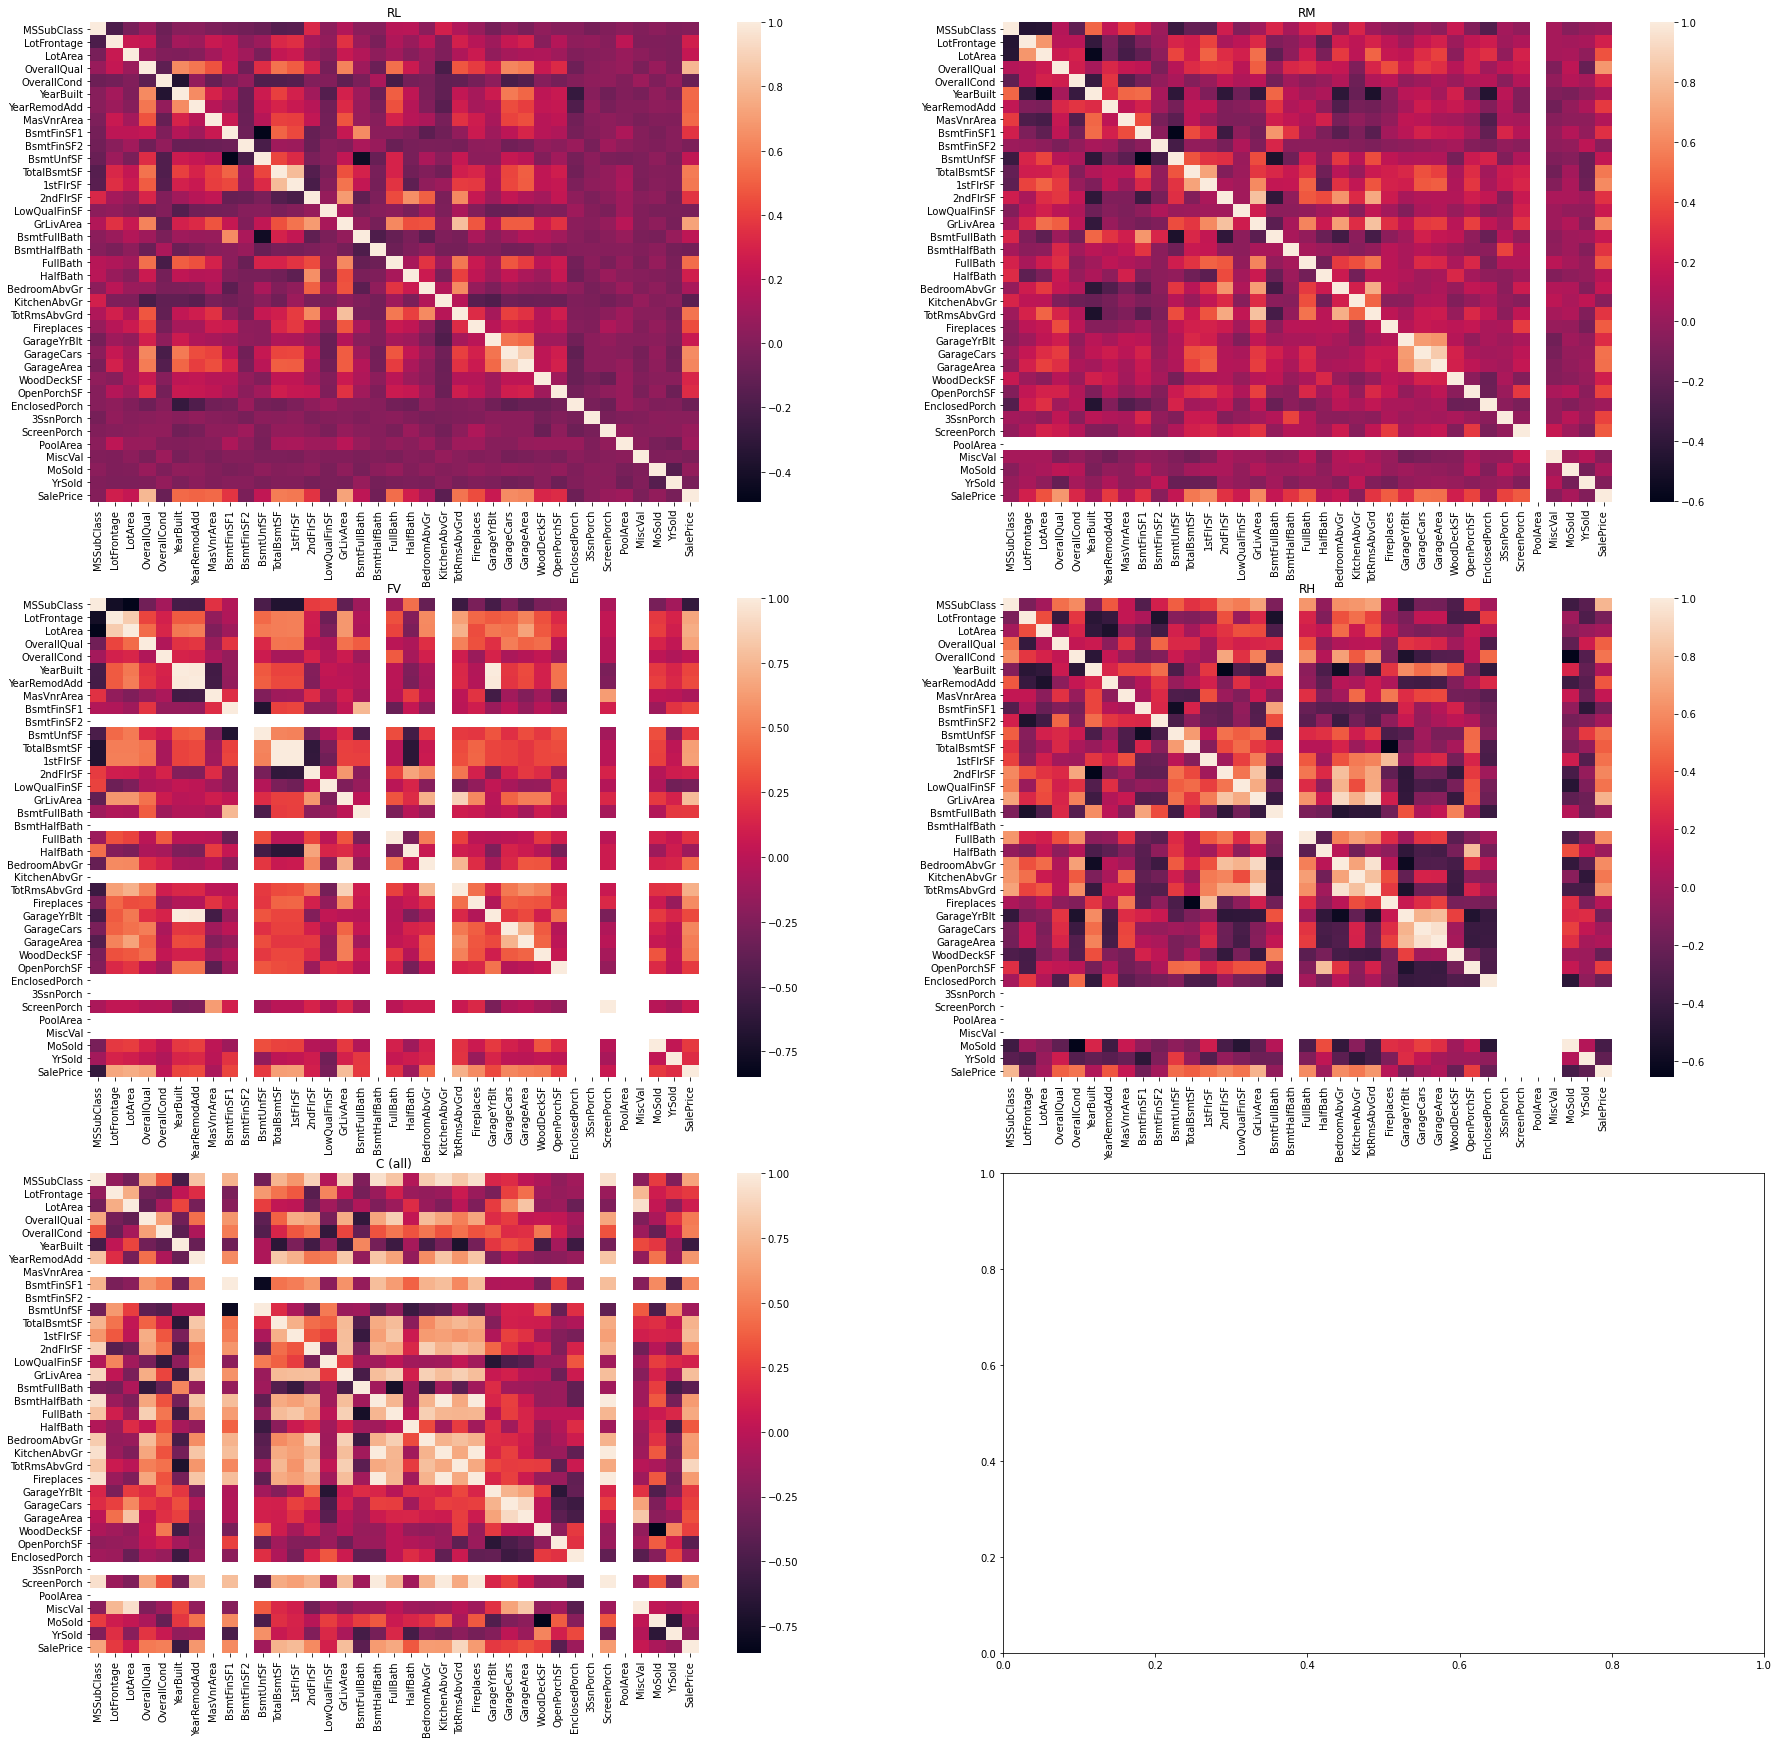

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (30,30))
col_id=0
row_id=0
for key in class_town:
    ax[row_id, col_id].set_title(key)
    sns.heatmap(class_town[key].corr(), ax=ax[row_id, col_id])
    # ax[row_id, col_id].set_title(col)
    # ax[row_id, col_id].boxplot(numerical_data[col])
    col_id+=1
    if col_id==2:
        row_id+=1
        col_id=0

 На этих графиках видно корреляцию переменных для каждого признака, и для каждого типа недвижимости они свои, сейчас найдём переменные, у которых корреляция с ценной наибольшая, и посмотрим на зависимость между этими переменными.

In [23]:
for key in class_town:
    cor_df = abs(class_town[key].corr())['SalePrice'].sort_values(ascending=False)
    print(f"{key} {cor_df.index[1]} {cor_df[1]}")

RL OverallQual 0.7988073809952435
RM OverallQual 0.6602749157792758
FV GrLivArea 0.7702667234072786
RH MSSubClass 0.7694811413621392
C (all) TotRmsAbvGrd 0.8958689853401035


In [24]:
check_par = ['OverallQual', 'OverallQual', 'GrLivArea', 'MSSubClass', 'TotRmsAbvGrd']
fig = make_subplots(cols=3, rows=2, subplot_titles=tuple(class_town.keys()))
col=1
row=1
for key, name in zip(class_town, check_par):
    X = class_town[key][name].values
    Y = class_town[key]['SalePrice'].values
    fig.add_trace(go.Scatter(x=X, y=Y, mode='markers', name=name),row=row, col=col)
    col+=1
    if col==4:
        row+=1
        col=1
fig.update_layout(title_text="Mean variabels")
fig.show()

 Мы посмотрели на переменные, которые имеют высокую корреляцию с ценной недвижимости. Мы нашли значимые признаки для каждого типа недвижимости, теперь попробуем найти важные признаки вне зависимости от категории.

<AxesSubplot:>

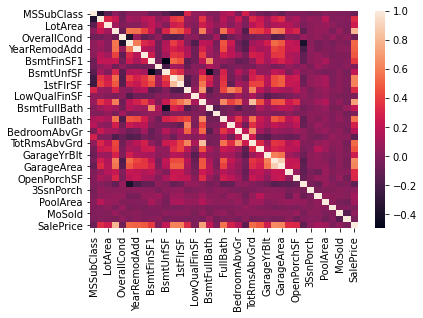

In [25]:
sns.heatmap(numerical_data.corr())

Так же как же найдём значемые переменные, найдём 6 самых значемых признаков

In [26]:
corr_mat = numerical_data.corr()
mean_var= abs(corr_mat.SalePrice).sort_values(ascending=False).iloc[1:7]
mean_var

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
Name: SalePrice, dtype: float64

также построим графики

In [27]:
name = tuple(mean_var.index)
fig = make_subplots(cols=3, rows=3, subplot_titles=tuple(mean_var.index))
col=1
row=1
for i in name :
    X = numerical_data[i].values
    Y = numerical_data['SalePrice']
    fig.add_trace(go.Scatter(x=X, y=Y, mode='markers'),row=row, col=col)
    col+=1
    if col==4:
        row+=1
        col=1
fig.update_layout(title_text="Mean variabels for all data",  autosize=False,
    width=800,
    height=800, showlegend=False)
fig.show()

### Мы нашли значемые переменные, объясним полученные результаты:
    1. OverallQual- Оценивает общий материал и отделку дома
    2. GrLivArea - площадь помещения
    3. GarageCars+GarageArea - площадь гаража и количество мест 
    4. TotalBsmtSF  - площадь подвала
    5. irst Floor square feet - площадь первого этажа
Полученные данные вполне соответствуют действительности, цена дома напрямую зависит от площади помещений и качества материалов (следуя моей логике). Но в определённых классах жилья провялится свои особенности, в классах жилья RL и RM ключевым фактором является качество материалов(OverallQual), в FV общая площадь помещения (GrLivArea), в RH тип жилья, в C (all) количество комнат.

Сейчас разобём данные на класетры внезависимости от категории и посмотрим что это нам покажет. Для уменьшеня разамерности будем использовать TSNE

Така как у нас данные в измеряются в разных шкалах - стандартизируем их

In [28]:
std = StandardScaler()
std_data = std.fit_transform(numerical_data)

In [29]:
tsne = TSNE()
clstr_data = tsne.fit_transform(std_data) 

In [31]:
class_dict= {val:num for num, val in enumerate(train_df['MSZoning'].unique())}

In [32]:
color = train_df['MSZoning'].map(lambda x: class_dict[x])

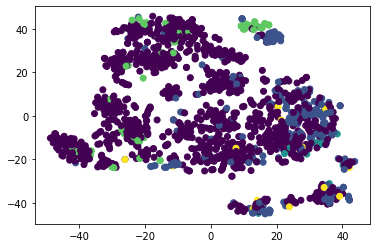

In [33]:
plt.scatter(x=clstr_data[:,0], y=clstr_data[:,1], c=color)

 Данне не разделяются на кластеры по классам попробуем кластеризовать их с помощью метода KMeans.

In [34]:
kmean = KMeans()
pred_clstr=kmean.fit_predict(clstr_data)

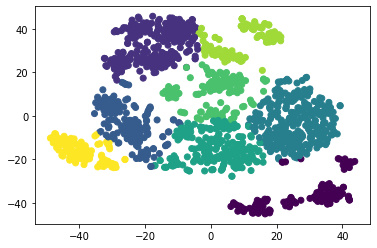

In [35]:
plt.scatter(x=clstr_data[:,0], y=clstr_data[:,1], c=pred_clstr)

Мы получили разбиение на кластеры, посмотрм на ценовой диапозон каждого кластера

In [36]:
numerical_data['clstr'] = pred_clstr
clstr_price = {cl: numerical_data.loc[numerical_data.clstr==cl, 'SalePrice'] for cl in numerical_data.clstr.unique()}

Посмотрим полученные результаты на графиках бокс плот (моё любимео:=)

In [37]:
fig = go.Figure()
for key in clstr_price:
    fig.add_trace(go.Box(y=clstr_price[key], name=str(key)))
fig.update_layout(title='Cluster price')
fig.show()

Цены в некоторых кластерах различаются несильно, значит алгоритм кластеризация не подходит чтобы явно разбить данные по ценовому признаку. 

На основе числовых данных построим модель для предсказания цены дома

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_squared_error

In [64]:
numerical_data.drop('clstr', axis=1, inplace=True)

In [65]:
X = numerical_data.drop('SalePrice', axis=1)
y= np.log(numerical_data.SalePrice)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3, shuffle=True)

In [67]:
norm = Normalizer()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

In [68]:
forest = RandomForestRegressor()
tree = DecisionTreeRegressor()
lin_reg= LinearRegression()

In [74]:
str(lin_reg)

'LinearRegression()'

In [75]:
models = [forest.fit(X_train, y_train), tree.fit(X_train, y_train), lin_reg.fit(X_train, y_train)]
errors =  {str(mod): mean_squared_error(y_test,mod.predict(X_test))  for mod in models}

In [87]:
# gist = go.Bar(x=list(numerical_data.columns), y =list(forest.feature_importances_))
g_data = [go.Bar(x=[er], y=[errors[er]]) for er in errors]
fig = go.Figure(data=g_data)
fig.update_layout(title_text='Mean square error',showlegend=False)

Мы построили три модели и посмотрели их среднюю квадратичную ошибвку, но также важне посмотреть на распределение ошибок

In [99]:
def sq_error(y_pred, y_test):
    return (y_pred-y_test)**2

gr_errors = {}
for mod in models:
    y_pred = mod.predict(X_test)
    er = sq_error(y_pred, y_test)
    gr_errors[str(mod)] = er

fig = ff.create_distplot(list(gr_errors.values()), list(gr_errors.keys()), show_hist=False, bin_size=[.1, .25, .5, 1])
fig.show()

Как на гистограмме ,так и на графике распределения лучше всего себя показала модель LinearRegression, она имеют низку среднию ошибку и низкую диспресию ошибкт. Эту модель стоит вырать для подбора параметров и улучшения качества предсказаний.
Но сейчас нам интересна модель RandomForestRegressor

In [101]:
gist = go.Bar(x=list(numerical_data.columns), y =list(forest.feature_importances_))
fig = go.Figure(data=[gist])
fig.update_layout(title_text='Feature importances')

Модель обучалась в основном опираясь на перемнную Fireplaces, это было неожиданно. Мы узнали что количество камионв силбнее всего влияет на решение модели. Можно сделать странныё вывод, что пстроив больше каминов можно продать дороже дом 

# Вывод 
В ходе анализа данных мы выяснили что может позволить американская семья, от чего зависит цена на дом и как она распределена в  зависимости от категории. Узнали, что цена на недвижимость в г.Эймс фактически не растёт, а даже падает, и она имеет сезонность, обучили несколько моделей и выбрали лучшую, для дальнейшего улучшения.